In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
cnt = read_delim(
    "/home/jovyan/work/DATA/fastq_cbb520_hw3/pipeline_bwa/out_count/ERR1994755.txt",
    delim = "\t")

Parsed with column specification:
cols(
  Geneid = col_character(),
  `/home/jovyan/work/DATA/fastq_cbb520_hw3/pipeline_bwa/out_bwa/ERR1994755_align_sorted.bam` = col_double()
)


In [8]:
info = read_delim("/home/jovyan/work/GitRepo/Duke_CBB520_HW3/pipeline_bwa/mart_export.txt", delim = "\t")

Parsed with column specification:
cols(
  `Gene stable ID` = col_character(),
  `Gene stable ID version` = col_character(),
  `Transcript stable ID` = col_character(),
  `Transcript stable ID version` = col_character(),
  `Gene name` = col_character()
)


In [10]:
head(info)

Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Gene name
<chr>,<chr>,<chr>,<chr>,<chr>
ENSCAFG00000022744,ENSCAFG00000022744.1,ENSCAFT00000034851,ENSCAFT00000034851.1,NA
ENSCAFG00000022743,ENSCAFG00000022743.1,ENSCAFT00000034850,ENSCAFT00000034850.1,NA
ENSCAFG00000022742,ENSCAFG00000022742.1,ENSCAFT00000034849,ENSCAFT00000034849.1,MT-CYB
ENSCAFG00000022741,ENSCAFG00000022741.1,ENSCAFT00000034848,ENSCAFT00000034848.1,NA
ENSCAFG00000022740,ENSCAFG00000022740.1,ENSCAFT00000034847,ENSCAFT00000034847.1,MT-ND6
ENSCAFG00000022739,ENSCAFG00000022739.1,ENSCAFT00000034846,ENSCAFT00000034846.1,ND5


In [4]:
colnames(cnt) = c("Geneid", "ERR1994755")

In [7]:
cnt %>% filter(ERR1994755 !=0)

Geneid,ERR1994755
<chr>,<dbl>
ENSCAFG00000022708,17
ENSCAFG00000022709,385
ENSCAFG00000022711,615
ENSCAFG00000022712,1
ENSCAFG00000022713,239
ENSCAFG00000022717,195
ENSCAFG00000022718,2
ENSCAFG00000022719,7
ENSCAFG00000022720,4


In [17]:
cnt %>% filter(ERR1994755 !=0) %>% left_join(.,info, by = c("Geneid" = "Gene stable ID")) %>% select("Geneid", "Gene name", "ERR1994755") %>% na.omit -> dat

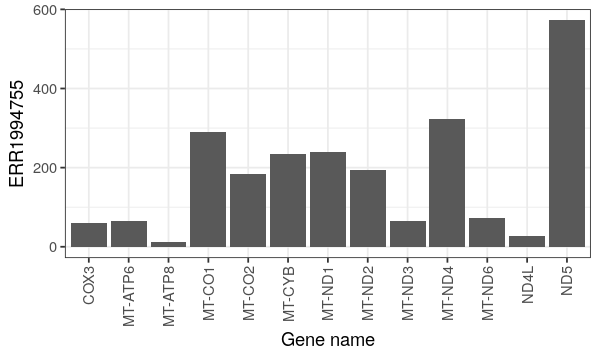

In [37]:
#qplot(dat$`Gene name`, dat$ERR1994755) + theme()
options(repr.plot.height=3, repr.plot.width=5)
ggplot(arrange(dat, ERR1994755), aes(x=`Gene name`, y=ERR1994755)) +
  geom_bar(stat="identity") + 
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.5))
   

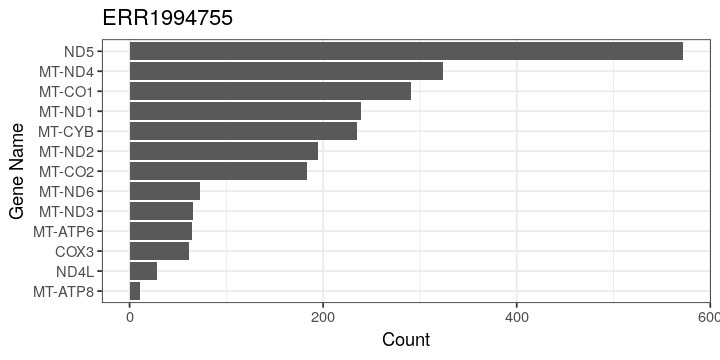

In [44]:
options(repr.plot.height=3, repr.plot.width=6)
g <- ggplot(dat, aes(reorder(`Gene name`, ERR1994755), ERR1994755)) + labs(title="ERR1994755", x="Gene Name", y="Count")
g + geom_bar(stat="identity") + coord_flip() + theme_bw()